# Figure  (NLP 2023.6)

In [1]:
import os
import numpy as np
import pickle

from config import MRI8_NVF4_10mm_0p2mmVVV as cfg1
from config import MRI8_NVF4_10mm_0p0mmVVV as cfg2
from config import MRI8_NVF4_10mm_0p0mmVVVV as cfg3

from config import MRI5_NVF1_10mm_0p4mmV_1 as cfg4


os.chdir('../')
from lib.methods import *
from lib.figure import NLP

os.chdir('../')

2023-05-20 19:17:11.612735: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Load data

In [2]:
[mic_t_data1, mic_data1] = LoadCSV(
                                file_path=cfg1.CSV_FILE_DIR+cfg1.DATA_NAME+cfg1.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

[mic_t_data2, mic_data2] = LoadCSV(
                                file_path=cfg2.CSV_FILE_DIR+cfg2.DATA_NAME+cfg2.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

[mic_t_data3, mic_data3] = LoadCSV(
                                file_path=cfg3.CSV_FILE_DIR+cfg3.DATA_NAME+cfg3.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

[mic_t_data4, mic_data4] = LoadCSV(
                                file_path=cfg4.CSV_FILE_DIR+cfg4.DATA_NAME+cfg4.ADDITIONAL_PATH+'.csv', 
                                data_name_list=['t', 'mic'], 
                                sample_span=[0, None]
                                )

Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p2mmVVV.csv
data list | t, mic
Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVV.csv
data list | t, mic
Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI8_NVF4_10mm_0p0mmVVVV.csv
data list | t, mic
Loading csv data
file path | ./data/VF_FVF_DATASETS/CSV/MRI5_NVF1_10mm_0p4mmV_1.csv
data list | t, mic


## Pre-process

In [3]:
PP = PreProcessing_forESN(data=mic_data1, t_data=mic_t_data1)
PP.filter(method=cfg1.FILTER_METHOD, params=cfg1.BANDPASS_PARAMS)
PP.cut(span=cfg1.SAMPLE_SPAN, new_t=False)
PP.embed(n_shift=cfg1.TRAIN_TEST_DATA_PARAMS['n_shift'], 
         n_dimension=cfg1.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X1, train_Y1, test_X1, test_Y1 = PP.train_test_split(n_train=cfg1.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                       n_predstep=cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep'])
train_t1 = PP.t_data[cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y1.shape[0]]
test_t1 = PP.t_data[cfg1.TRAIN_TEST_DATA_PARAMS['n_train']+cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg1.TRAIN_TEST_DATA_PARAMS['n_train']+cfg1.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y1.shape[0]]

PP = PreProcessing_forESN(data=mic_data2, t_data=mic_t_data2)
PP.filter(method=cfg2.FILTER_METHOD, params=cfg2.BANDPASS_PARAMS)
PP.cut(span=cfg2.SAMPLE_SPAN, new_t=False)
PP.embed(n_shift=cfg2.TRAIN_TEST_DATA_PARAMS['n_shift'], 
         n_dimension=cfg2.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X2, train_Y2, test_X2, test_Y2 = PP.train_test_split(n_train=cfg2.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                       n_predstep=cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep'])
train_t2 = PP.t_data[cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y2.shape[0]]
test_t2 = PP.t_data[cfg2.TRAIN_TEST_DATA_PARAMS['n_train']+cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg2.TRAIN_TEST_DATA_PARAMS['n_train']+cfg2.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y2.shape[0]]

PP = PreProcessing_forESN(data=mic_data3, t_data=mic_t_data3)
PP.filter(method=cfg3.FILTER_METHOD, params=cfg3.BANDPASS_PARAMS)
PP.cut(span=cfg3.SAMPLE_SPAN, new_t=False)
PP.embed(n_shift=cfg3.TRAIN_TEST_DATA_PARAMS['n_shift'], 
         n_dimension=cfg3.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X3, train_Y3, test_X3, test_Y3 = PP.train_test_split(n_train=cfg3.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                       n_predstep=cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep'])
train_t3 = PP.t_data[cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y3.shape[0]]
test_t3 = PP.t_data[cfg3.TRAIN_TEST_DATA_PARAMS['n_train']+cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg3.TRAIN_TEST_DATA_PARAMS['n_train']+cfg3.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y3.shape[0]]

PP = PreProcessing_forESN(data=mic_data4, t_data=mic_t_data4)
PP.filter(method=cfg4.FILTER_METHOD, params=cfg4.BANDPASS_PARAMS)
PP.cut(span=cfg4.SAMPLE_SPAN, new_t=False)
PP.embed(n_shift=cfg4.TRAIN_TEST_DATA_PARAMS['n_shift'], 
         n_dimension=cfg4.TRAIN_TEST_DATA_PARAMS['n_dimension'])
train_X4, train_Y4, test_X4, test_Y4 = PP.train_test_split(n_train=cfg4.TRAIN_TEST_DATA_PARAMS['n_train'], 
                                                       n_predstep=cfg4.TRAIN_TEST_DATA_PARAMS['n_predstep'])
train_t4 = PP.t_data[cfg4.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg4.TRAIN_TEST_DATA_PARAMS['n_predstep']+train_Y4.shape[0]]
test_t4 = PP.t_data[cfg4.TRAIN_TEST_DATA_PARAMS['n_train']+cfg4.TRAIN_TEST_DATA_PARAMS['n_predstep']:cfg4.TRAIN_TEST_DATA_PARAMS['n_train']+cfg4.TRAIN_TEST_DATA_PARAMS['n_predstep']+test_Y4.shape[0]]

## Load ESN model

In [4]:
esn1 = pickle.load(open(cfg1.MODEL_DIR+cfg1.DATA_NAME+'.pkl', 'rb'))

esn2 = pickle.load(open(cfg2.MODEL_DIR+cfg2.DATA_NAME+'.pkl', 'rb'))

esn3 = pickle.load(open(cfg3.MODEL_DIR+cfg3.DATA_NAME+'.pkl', 'rb'))

esn4 = pickle.load(open(cfg4.MODEL_DIR+cfg4.DATA_NAME+'.pkl', 'rb'))

## Figure

In [5]:
class NLP_p():

    def __init__(self, rcParams_dict):
        for key in rcParams_dict.keys():
            plt.rcParams[str(key)] = rcParams_dict[str(key)]      

    def figure(self, 
                data, model, t, lyapunov_exponents, 
                figsize=(35, 5), width_ratios=[4, 4, 7, 8], wspace=0.4,
                n_shift=25, n_plt_e=3000, n_initdel=2000, n_plt_m=3000, same_lim=True,
                lw_data=3, lw_model=4,
                freq_lim=(50, 350),
                n_dim=4, lyapunov_lim=(-110, 20), 
                panel_list = ['(a)', '(b)', '(c)', '(d)'], panel_xy_list=[(0.14, 1.), (0.14, 1.), (0.21, 1), (0.25, 1)], panel_fontsize=40, 
                save_png=None, save_eps=None):
        spec = gridspec.GridSpec(ncols=4, nrows=1, width_ratios=width_ratios, wspace=wspace)
        fig = plt.figure(figsize=figsize)
        freq_data, amp_data = fft(data, t)
        freq_model, amp_model = fft(model, t)

        ax0 = fig.add_subplot(spec[0])
        ax0.set_title('Exp', loc='center')
        ax0.plot(data[n_initdel:][n_shift:][:n_plt_e], data[n_initdel:][:-n_shift][:n_plt_e], linestyle='-', c='k', lw=lw_data)
        ax0.set_xlabel(r'$x(t)$')
        ax0.set_ylabel(r'$x(t-\tau)$')
        ax0.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax0.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax0.set_aspect('equal', 'datalim')
        fig.text(ax0.get_position().x1-panel_xy_list[0][0], ax0.get_position().y1-panel_xy_list[0][1], s=panel_list[0], fontsize=panel_fontsize)

        ax1 = fig.add_subplot(spec[1])
        ax1.set_title('Model', loc='center')
        ax1.plot(model[n_initdel:][n_shift:][:n_plt_m], model[n_initdel:][:-n_shift][:n_plt_m], linestyle='-', c='r', lw=lw_model)
        if same_lim:
            ax1.set_xlim(ax0.get_xlim())
            ax1.set_ylim(ax0.get_ylim())
        ax1.set_xlabel(r'$x(t)$')
        ax1.set_ylabel(r'$x(t-\tau)$')
        ax1.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax1.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax1.set_aspect('equal', 'datalim')
        fig.text(ax1.get_position().x1-panel_xy_list[1][0], ax1.get_position().y1-panel_xy_list[1][1], s=panel_list[1], fontsize=panel_fontsize)

        ax2 = fig.add_subplot(spec[2])
        ax2.plot(freq_data, amp_data, lw=5, c='k', label='Exp')
        ax2.plot(freq_model, amp_model, '--', lw=4, c='r', label='Model')
        ax2.set_xlabel('Frequency [Hz]')
        ax2.set_ylabel('Power Spectral Density')
        ax2.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%d'))
        ax2.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%.1f'))
        ax2.set_xlim(freq_lim)
        ax2.legend(frameon=False)
        fig.text(ax2.get_position().x1-panel_xy_list[2][0], ax2.get_position().y1-panel_xy_list[2][1], s=panel_list[2], fontsize=panel_fontsize)

        ax3 = fig.add_subplot(spec[3])
        ax3.axhline(y=0, xmin=0, xmax=n_dim+1, linestyle='dashed', c='b', lw=4)
        ax3.plot(np.arange(1, n_dim+1), lyapunov_exponents[:n_dim], linestyle='-', c='r', 
                lw=4, marker='o', markersize=15)
        ax3.grid()
        ax3.set_ylim(lyapunov_lim)
        ax3.set_xlabel('Dimension')
        ax3.set_ylabel('Lyapunov Exponents')
        fig.text(ax3.get_position().x1-panel_xy_list[3][0], ax3.get_position().y1-panel_xy_list[3][1], s=panel_list[3], fontsize=panel_fontsize)

        plt.tight_layout()
        if save_png==None:
            plt.show()
        else:
            plt.savefig(save_png+'.png', bbox_inches="tight")
        if save_png==None:
            return
        else:
            plt.savefig(save_eps+'.eps', bbox_inches="tight")

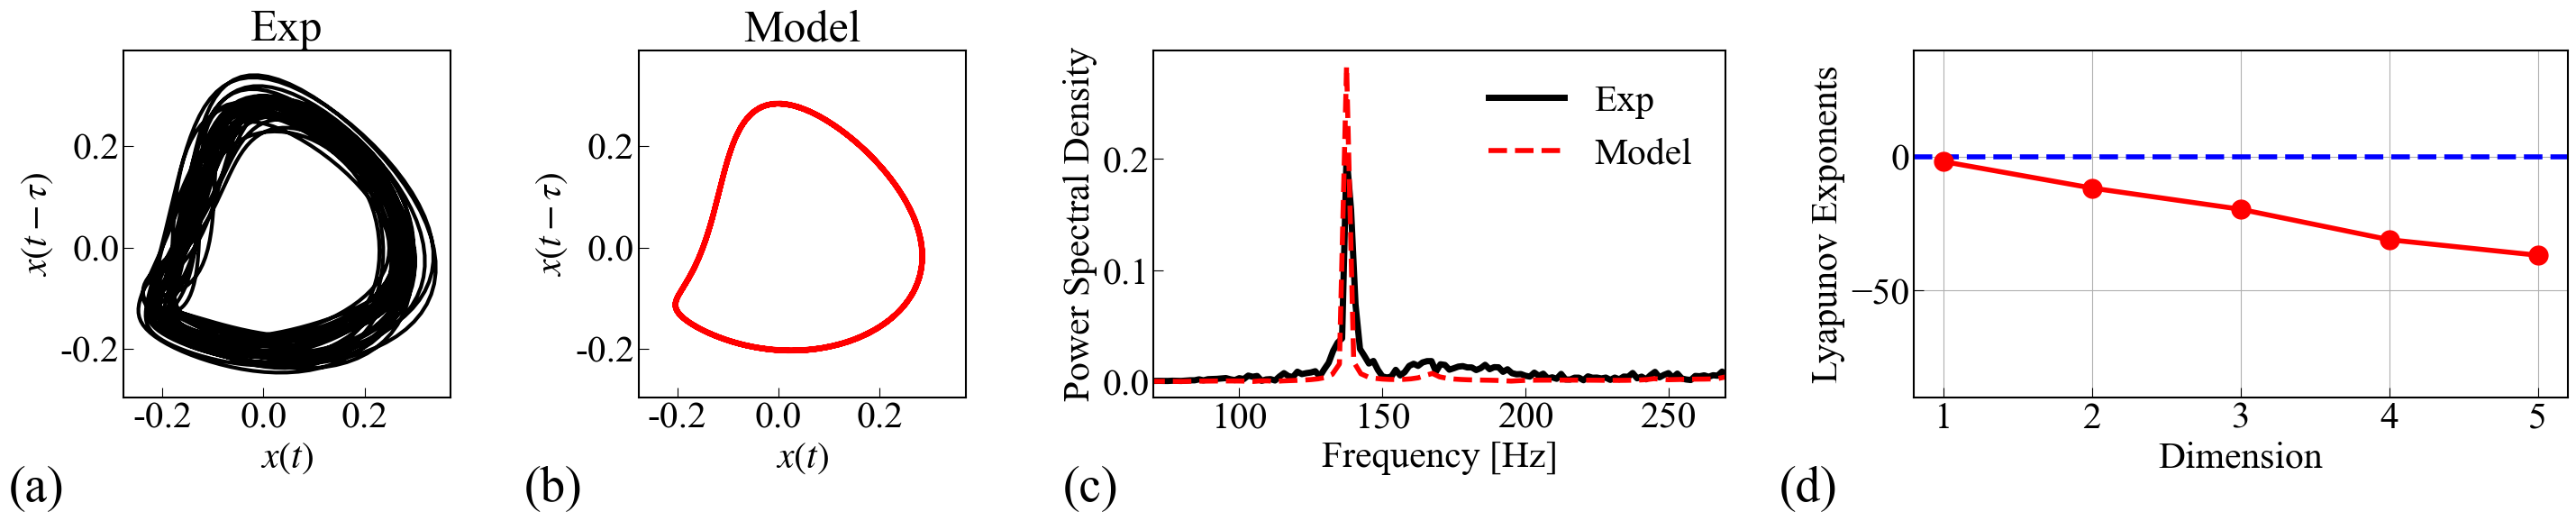

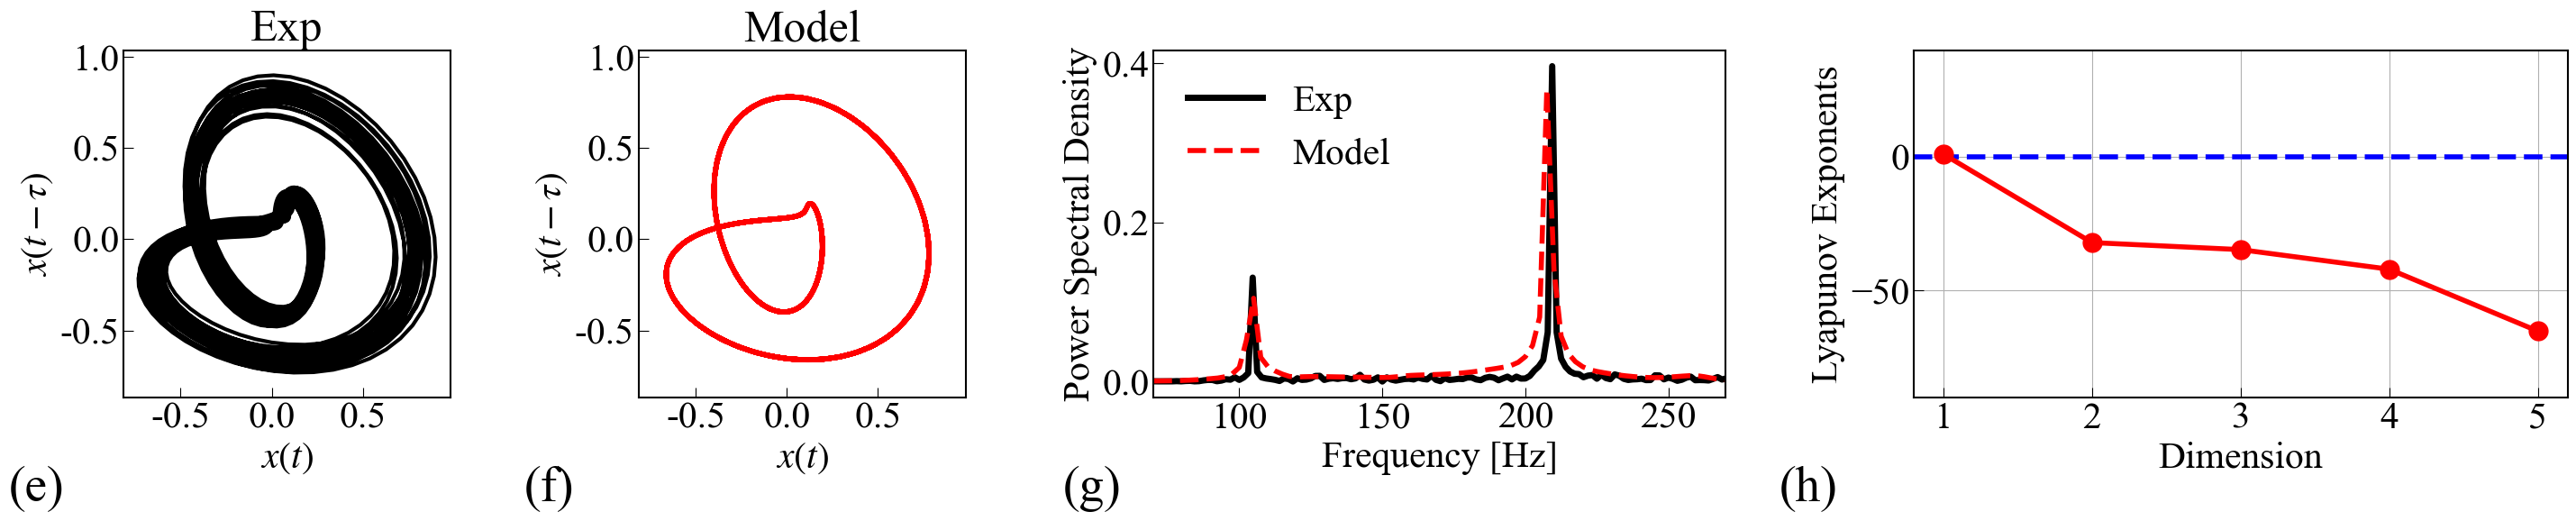

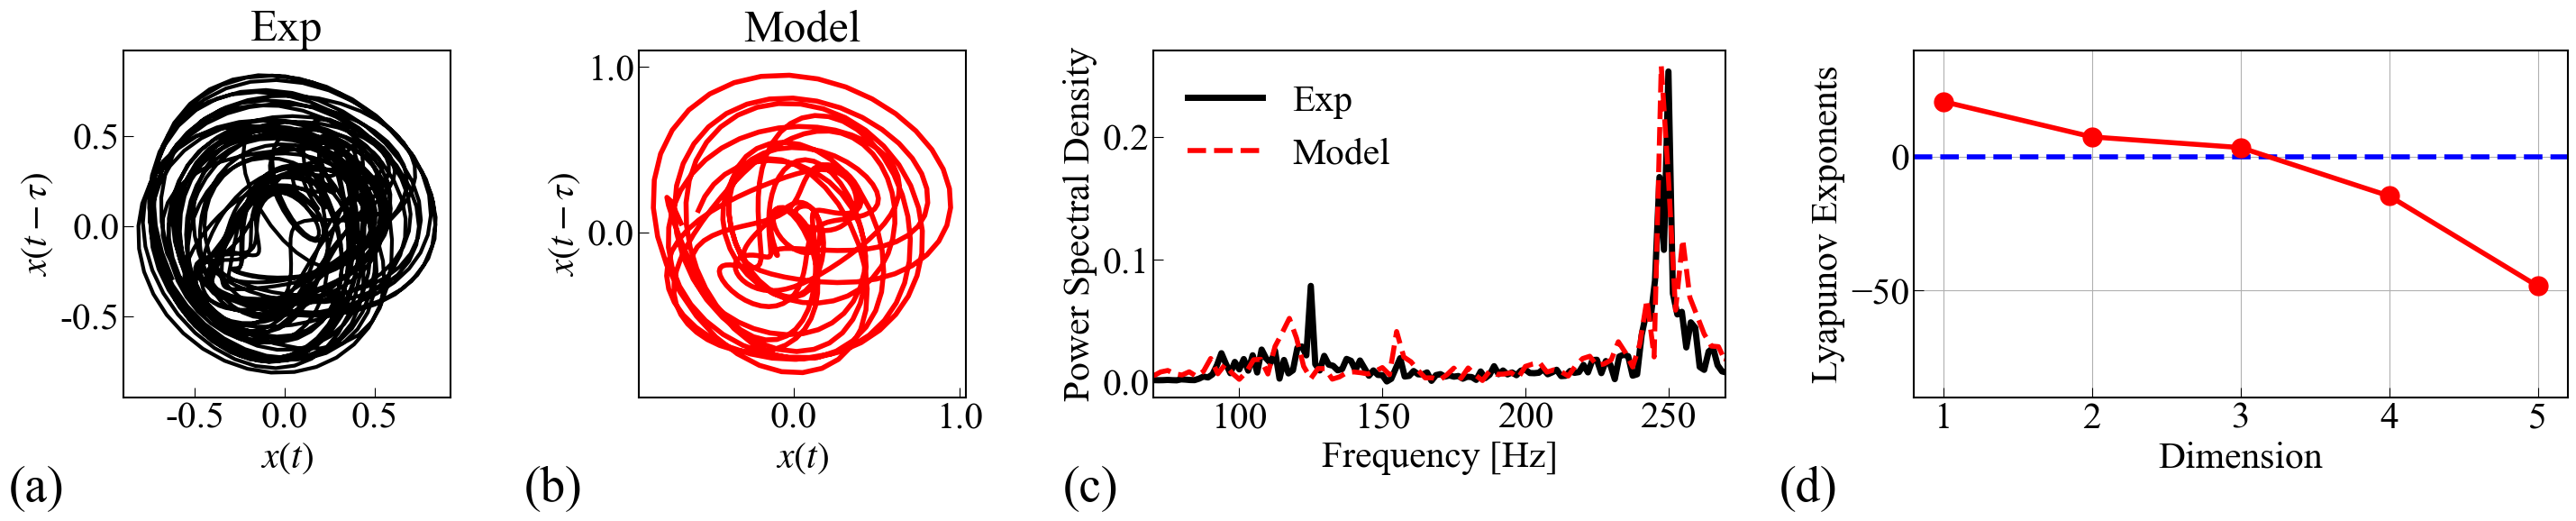

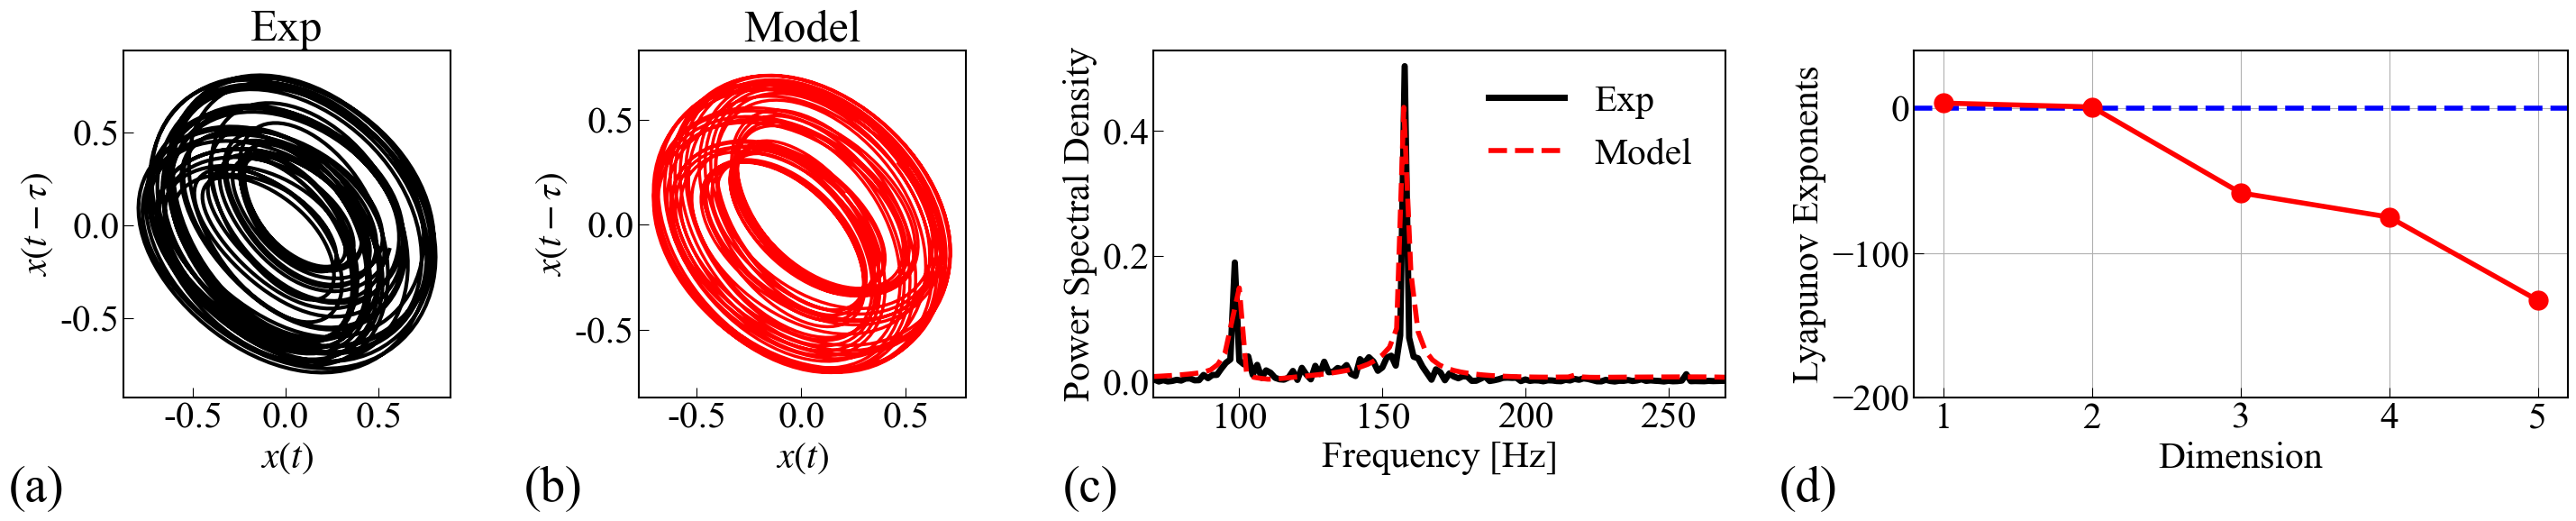

In [15]:
fig = NLP_p({
            'font.family':'Times New Roman',
            'mathtext.fontset':'stix',
            'font.size':30,
            'xtick.direction':'in',
            'ytick.direction':'in',
            'axes.linewidth':1.5,
            'xtick.major.size':8,
            'ytick.major.size':8,
            })
fig.figure(data=test_Y1[:8000, 0, 0], model=esn1.freerun_ans[:, 0], 
           t=test_t1[:], lyapunov_exponents=esn1.lyapunov_exponents, 
            figsize=(35, 5), width_ratios=[4, 4, 7, 8], wspace=0.4,
            n_shift=20, n_initdel=4000, n_plt_e=3000, n_plt_m=3000, same_lim=True,
            lw_data=3, lw_model=4,
            freq_lim=(70, 270),
            n_dim=5, lyapunov_lim=(-90, 40), 
            panel_list = ['(a)', '(b)', '(c)', '(d)'], panel_xy_list=[(0.14, 1.), (0.14, 1.), (0.21, 1), (0.25, 1)], panel_fontsize=40, 
            save_png=None, save_eps=None)

fig.figure(data=test_Y2[:8000, 0, 0], model=esn2.freerun_ans[:, 0], 
           t=test_t2[:], lyapunov_exponents=esn2.lyapunov_exponents, 
            figsize=(35, 5), width_ratios=[4, 4, 7, 8], wspace=0.4,
            n_shift=13, n_initdel=4000, n_plt_e=3000, n_plt_m=3000, same_lim=True,
            lw_data=3, lw_model=4,
            freq_lim=(70, 270),
            n_dim=5, lyapunov_lim=(-90, 40), 
            panel_list = ['(e)', '(f)', '(g)', '(h)'], panel_xy_list=[(0.14, 1.), (0.14, 1.), (0.21, 1), (0.25, 1)], panel_fontsize=40, 
            save_png=None, save_eps=None)

fig.figure(data=test_Y3[:8000, 0, 0], model=esn3.freerun_ans[:, 0], 
           t=test_t3[:], lyapunov_exponents=esn3.lyapunov_exponents[:], 
            figsize=(35, 5), width_ratios=[4, 4, 7, 8], wspace=0.4,
            n_shift=9, n_initdel=0, n_plt_e=2000, n_plt_m=700, same_lim=False,
            lw_data=3, lw_model=4,
            freq_lim=(70, 270),
            n_dim=5, lyapunov_lim=(-90, 40), 
            panel_list = ['(a)', '(b)', '(c)', '(d)'], panel_xy_list=[(0.14, 1.), (0.14, 1.), (0.21, 1), (0.25, 1)], panel_fontsize=40, 
            save_png=None, save_eps=None)

fig.figure(data=test_Y4[:8000, 0, 0], model=esn4.freerun_ans[:, 0], 
           t=test_t4[:], lyapunov_exponents=esn4.lyapunov_exponents[:], 
            figsize=(35, 5), width_ratios=[4, 4, 7, 8], wspace=0.4,
            n_shift=25, n_initdel=500, n_plt_e=3000, n_plt_m=3000, same_lim=False,
            lw_data=3, lw_model=2.5,
            freq_lim=(70, 270),
            n_dim=5, lyapunov_lim=(-200, 40), 
            panel_list = ['(a)', '(b)', '(c)', '(d)'], panel_xy_list=[(0.14, 1.), (0.14, 1.), (0.21, 1), (0.25, 1)], panel_fontsize=40, 
            save_png=None, save_eps=None)

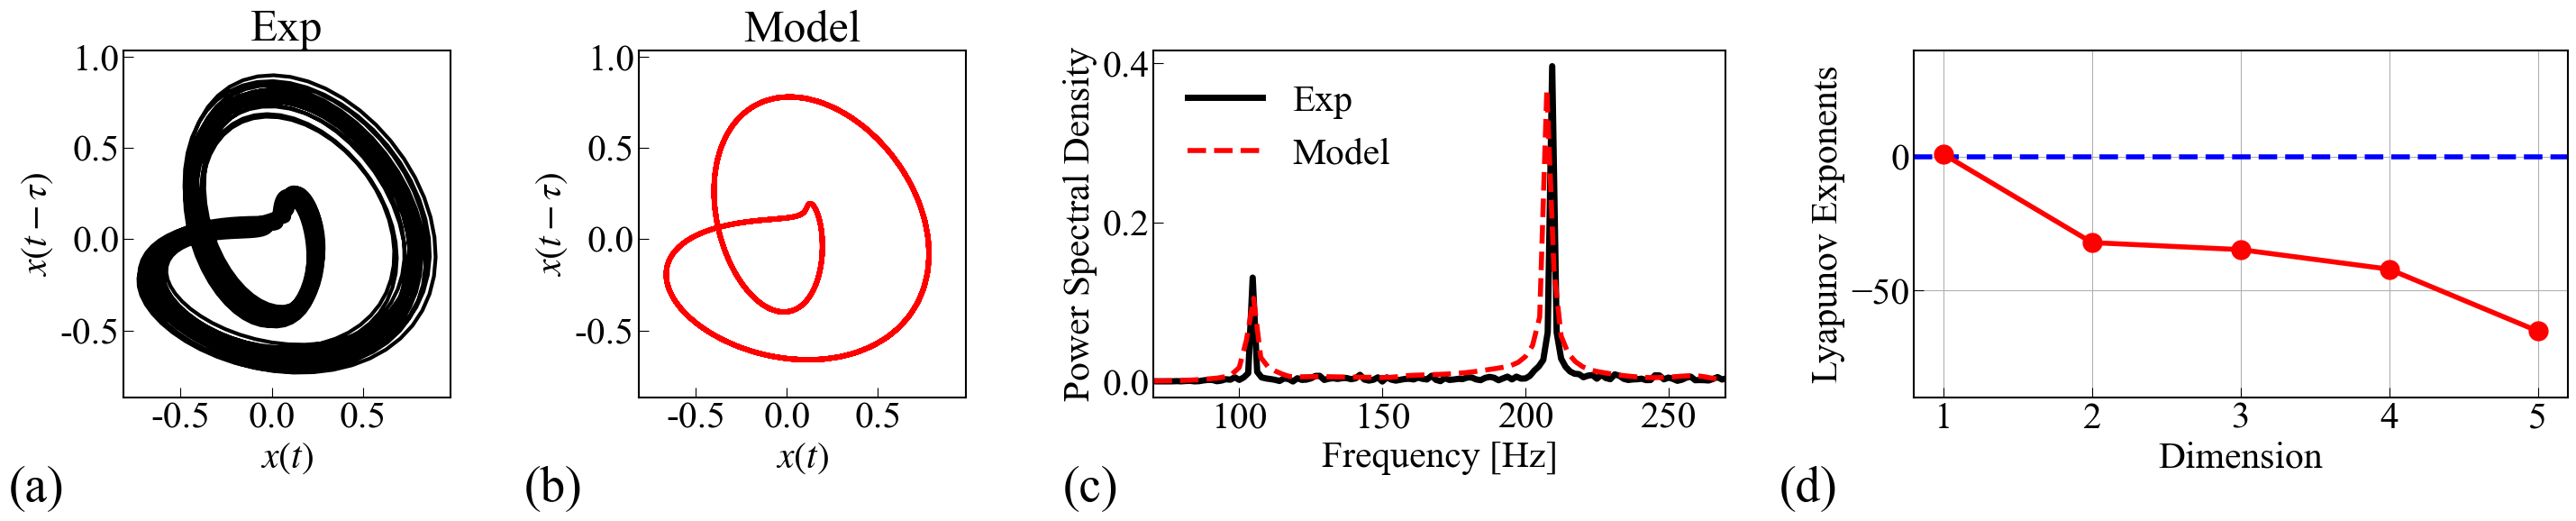

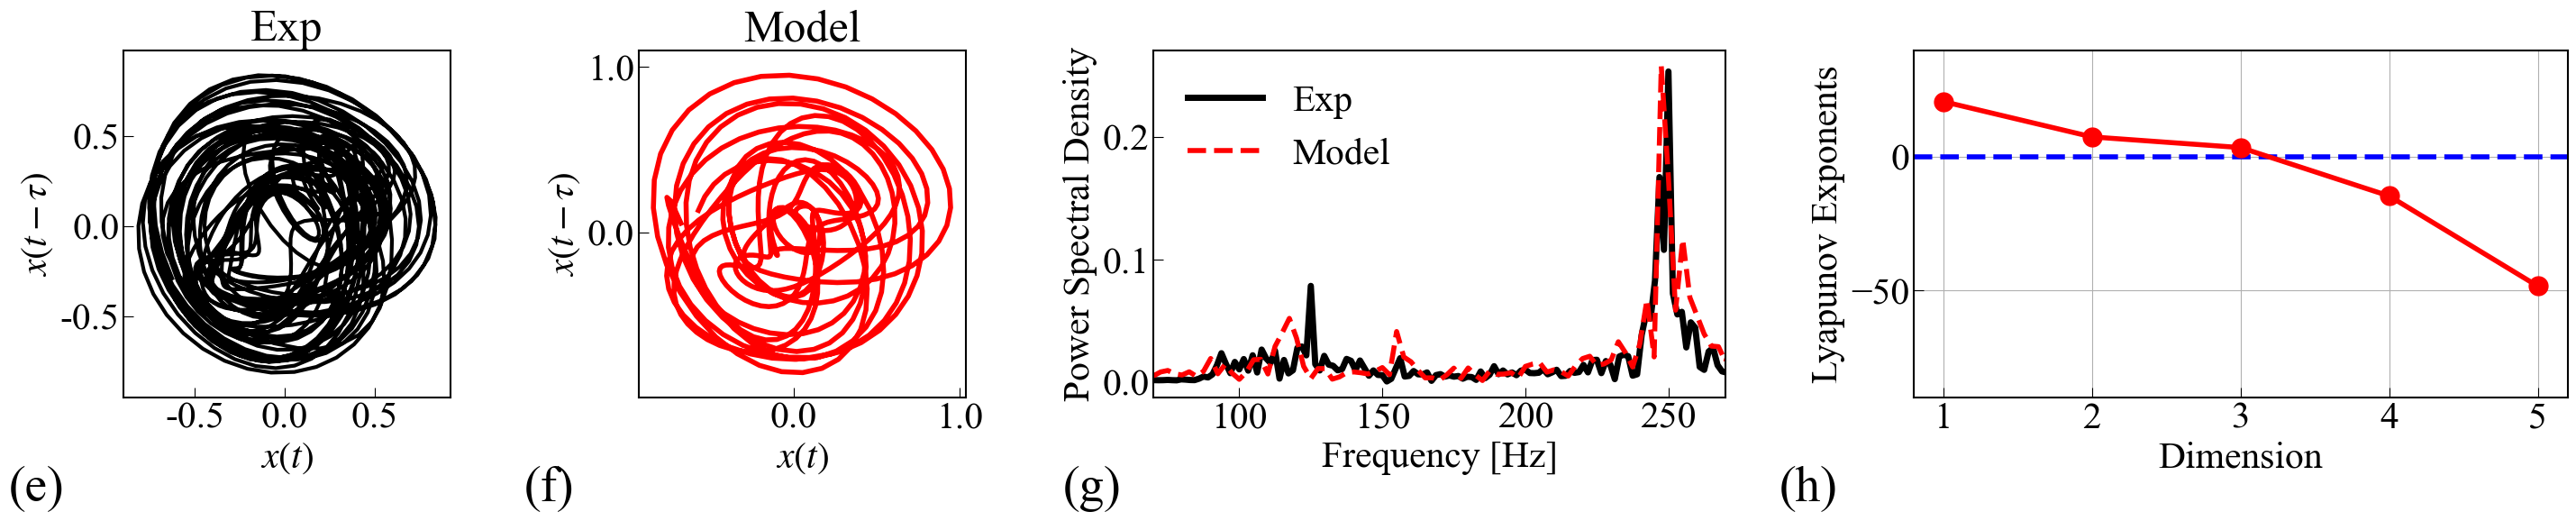

In [16]:
fig.figure(data=test_Y2[:8000, 0, 0], model=esn2.freerun_ans[:, 0], 
           t=test_t2[:], lyapunov_exponents=esn2.lyapunov_exponents, 
            figsize=(35, 5), width_ratios=[4, 4, 7, 8], wspace=0.4,
            n_shift=13, n_initdel=4000, n_plt_e=3000, n_plt_m=3000, same_lim=True,
            lw_data=3, lw_model=4,
            freq_lim=(70, 270),
            n_dim=5, lyapunov_lim=(-90, 40), 
            panel_list = ['(a)', '(b)', '(c)', '(d)'], panel_xy_list=[(0.14, 1.), (0.14, 1.), (0.21, 1), (0.25, 1)], panel_fontsize=40, 
            save_png=None, save_eps=None)

fig.figure(data=test_Y3[:8000, 0, 0], model=esn3.freerun_ans[:, 0], 
           t=test_t3[:], lyapunov_exponents=esn3.lyapunov_exponents[:], 
            figsize=(35, 5), width_ratios=[4, 4, 7, 8], wspace=0.4,
            n_shift=9, n_initdel=0, n_plt_e=2000, n_plt_m=700, same_lim=False,
            lw_data=3, lw_model=4,
            freq_lim=(70, 270),
            n_dim=5, lyapunov_lim=(-90, 40), 
            panel_list = ['(e)', '(f)', '(g)', '(h)'], panel_xy_list=[(0.14, 1.), (0.14, 1.), (0.21, 1), (0.25, 1)], panel_fontsize=40, 
            save_png=None, save_eps=None)